In [1]:
from TechnicalIndicators import get_TI
from DataPreprocessing import *
from Model import LSTM_model
from LoadData import stock_price
from FundamentalIndicators import get_FI_for_model
from matplotlib import pyplot

Using TensorFlow backend.


Model works good enough with VIX, DXY, but it needs to converge, achives 55.3% with val loss of .6897

In [19]:
Company = 'XOM'
df = stock_price(Company, "1992-12-31", "2018-12-31")

batch_size = 30 #30, 50
n_days = 5 #5, 7

# df = get_FI_for_model(df)
df = get_TI(df)

(reframed_train_x, reframed_train_y), (reframed_test_x, reframed_test_y) = ready_data(df, split_ratio=0.85, batch_size=batch_size, n_days=n_days)

history, model = LSTM_model(reframed_train_x, reframed_train_y, reframed_test_x, reframed_test_y, n_days, batch_size, epochs=90)

Train X shape: (5515, 5, 9)
Train Y shape: (5515,) 
Test X shape:(955, 5, 9) 
Test Y shape: (955,)

Proportion of Target variable. 
Test set: 0.499 
Train set: 0.5025

Train on 5515 samples, validate on 955 samples
Epoch 1/90
5515/5515 [==============================] - 4s 648us/step - loss: 0.6935 - acc: 0.5128 - val_loss: 0.6934 - val_acc: 0.5079
Epoch 2/90
5515/5515 [==============================] - 2s 327us/step - loss: 0.6941 - acc: 0.5066 - val_loss: 0.6932 - val_acc: 0.4932
Epoch 3/90
5515/5515 [==============================] - 2s 279us/step - loss: 0.6928 - acc: 0.5151 - val_loss: 0.6931 - val_acc: 0.5141
Epoch 4/90
5515/5515 [==============================] - 2s 304us/step - loss: 0.6918 - acc: 0.5177 - val_loss: 0.6930 - val_acc: 0.5058
Epoch 5/90
5515/5515 [==============================] - 2s 313us/step - loss: 0.6922 - acc: 0.5113 - val_loss: 0.6930 - val_acc: 0.5288
Epoch 6/90
5515/5515 [==============================] - 2s 320us/step - loss: 0.6935 - acc: 0.5046 - val_

5515/5515 [==============================] - 1s 251us/step - loss: 0.6885 - acc: 0.5440 - val_loss: 0.6923 - val_acc: 0.5445
Epoch 60/90
5515/5515 [==============================] - 1s 254us/step - loss: 0.6889 - acc: 0.5414 - val_loss: 0.6924 - val_acc: 0.5487
Epoch 61/90
5515/5515 [==============================] - 1s 251us/step - loss: 0.6878 - acc: 0.5445 - val_loss: 0.6924 - val_acc: 0.5403
Epoch 62/90
5515/5515 [==============================] - 1s 251us/step - loss: 0.6881 - acc: 0.5456 - val_loss: 0.6924 - val_acc: 0.5455
Epoch 63/90
5515/5515 [==============================] - 1s 256us/step - loss: 0.6880 - acc: 0.5474 - val_loss: 0.6923 - val_acc: 0.5382
Epoch 64/90
5515/5515 [==============================] - 1s 252us/step - loss: 0.6879 - acc: 0.5432 - val_loss: 0.6922 - val_acc: 0.5361
Epoch 65/90
5515/5515 [==============================] - 1s 252us/step - loss: 0.6884 - acc: 0.5393 - val_loss: 0.6922 - val_acc: 0.5330
Epoch 66/90
5515/5515 [==============================

In [ ]:
model.evaluate(reframed_test_x, reframed_test_y)

In [22]:
pyplot.plot(history.history['loss'][:], label='train')
pyplot.plot(history.history['val_loss'][:], label='test')
pyplot.title('Loss')
pyplot.legend()
pyplot.show()

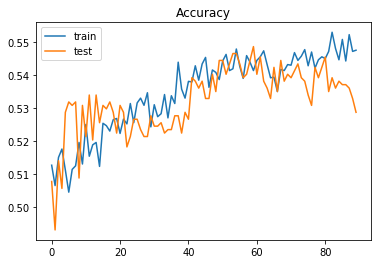

In [21]:
pyplot.plot(history.history['acc'][:], label='train')
pyplot.plot(history.history['val_acc'][:], label='test')
pyplot.title('Accuracy')
pyplot.legend()
pyplot.show()

In [ ]:
model.summary()